In [336]:
import matplotlib as mpl
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn import preprocessing

In [337]:
df_train1 = pd.read_excel("Большая выборка.xlsx")
df_train1['Выход годного, %'] = df_train1.apply(lambda row: 0 if float(row['Выход годного, %']) <=50 else 1, axis=1)
df_train1=df_train1.sample(frac=1)
ind = int(df_train1.shape[0]*0.70)
df_train=df_train1.iloc[:ind]
df_test=df_train1.iloc[ind:]
df_test2=df_train1.iloc[ind:]
testres = np.array(df_test['Выход годного, %'])
testres = pd.Series(testres)
trainres = np.array(df_train['Выход годного, %'])
trainres = pd.Series(trainres)
df_test = df_test.drop("Unnamed: 25", axis=1)
#df_test = df_test.drop('Выход годного, %', axis=1)
testnorm = preprocessing.scale(df_test)
df_test = pd.DataFrame(testnorm, columns=df_test.columns)
#df_test = pd.concat([df_test, testres], axis=1)
df_test['Выход годного, %'] = testres
df_train = df_train.drop("Unnamed: 25", axis=1)
trainnorm = preprocessing.scale(df_train)
df_train = pd.DataFrame(trainnorm, columns=df_train.columns)
df_train['Выход годного, %'] = trainres
#df_train['Выход годного, %'] = df_train.apply(lambda row: 0 if float(row['Выход годного, %']) == 0 else 1, axis=1)
#df_test['Выход годного, %'] = df_test.apply(lambda row: 0 if float(row['Выход годного, %']) == 0 else 1, axis=1)
df_train

,∆n сердц. преформы,К,"Lзаг, мм","dзаг, мм","dсер. Заг., мм",Dканср,L ср,"Некр. серд.заг., мм","Конус. серд.заг., мм","Децен. Заг., мм",...,Ср дельта фосфор,Некр ср,Конусн. Ср,СКО ср,Толщина кв.оболочки ср.,"Разряжение, КПа",Т консол,V подачи заг,Зазор,"Выход годного, %"
0,-0.988784,-0.440149,0.470060,0.252943,1.361067,-1.241644,0.760737,0.250177,-0.921908,-0.179683,...,-1.357663,-0.912115,-0.499823,0.979230,-0.776879,0.154299,0.246721,-0.232365,1.060660,1
1,-0.269964,0.388940,0.470060,0.252943,0.360499,-0.264013,-0.916997,0.350682,-0.693280,-0.057355,...,0.240610,0.703562,-0.883699,0.624339,0.728290,1.547082,0.246721,-0.232365,1.060660,1
2,0.227681,0.057305,-1.036101,0.748734,0.360499,-0.619515,0.760737,-0.513656,-0.647555,1.115558,...,-1.117165,0.015546,-0.961971,-1.596411,0.875136,0.154299,0.246721,-1.086461,-0.942809,1
3,-0.380552,-0.440149,0.553736,0.863147,-0.640069,-0.441764,2.438472,-0.573959,3.239119,-1.597252,...,1.115494,-1.221335,-0.164953,0.866550,-0.116073,0.154299,0.246721,-0.232365,1.060660,1
4,-0.767609,-0.440149,-0.283020,1.244525,1.861351,-0.826891,-0.916997,0.893405,-1.074327,-0.697779,...,-1.211849,2.025479,2.699822,-0.024154,-1.878222,-0.402815,-0.498924,-0.232365,1.060660,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,-1.265253,1.218029,0.386384,1.168250,1.861351,1.898626,-2.035486,-0.915674,-0.799973,-0.345186,...,-1.653079,-0.061759,-0.344639,1.514000,-0.336342,0.154299,0.246721,-1.086461,1.060660,1
64,2.328846,1.218029,2.227247,1.320801,-0.640069,1.217247,-0.637375,-0.654363,-0.159815,0.590266,...,0.429979,1.039839,-0.352807,1.218958,1.095405,2.011344,-1.990214,-0.232365,1.060660,0
65,-1.486428,-2.927415,-0.199345,-2.721803,-1.640638,0.802494,0.201493,-0.553858,0.800422,-0.337990,...,0.212204,1.909521,0.708977,-0.116197,-0.666745,0.154299,0.246721,1.902877,1.060660,1
66,1.278263,0.057305,2.645625,0.558045,-0.139785,-0.412139,0.481115,-0.212143,-0.510378,-0.625822,...,-0.602082,-0.680200,-0.420870,0.830200,1.021982,0.154299,0.246721,-0.232365,-0.942809,1


In [338]:
df_test2

,∆n сердц. преформы,К,"Lзаг, мм","dзаг, мм","dсер. Заг., мм",Dканср,L ср,"Некр. серд.заг., мм","Конус. серд.заг., мм","Децен. Заг., мм",...,Некр ср,Конусн. Ср,СКО ср,Толщина кв.оболочки ср.,"Разряжение, КПа",Т консол,V подачи заг,Зазор,"Выход годного, %",Unnamed: 25
85,0.01035,4.23,175,25.50,2.01,7.25600,1.425,0.013500,0.004700,0.0170,...,0.03000,0.048125,0.022840,0.7270,40.0,1600,14.0,0.0505,1,1.0
74,0.01077,4.30,157,25.50,1.99,7.24650,1.400,0.031500,0.025500,0.0320,...,0.02000,0.027500,0.023859,0.7215,40.0,1600,13.8,0.0505,1,1.0
81,0.01025,4.40,180,26.00,2.06,7.25675,1.440,0.016800,0.005200,0.0105,...,0.02500,0.028000,0.032212,0.7140,40.0,1600,13.6,0.0505,0,NaN
77,0.01030,4.20,155,25.08,1.99,7.23150,1.430,0.011000,0.017300,0.0277,...,0.04200,0.029500,0.039372,0.7035,40.0,1600,14.5,0.0305,1,1.0
9,0.01040,4.30,177,25.60,2.01,7.23700,1.430,0.013200,0.009800,0.0433,...,0.02800,0.035333,0.031576,0.7085,40.0,1600,14.0,0.0505,0,NaN
41,0.01015,4.35,185,25.47,2.03,7.23225,1.410,0.012700,0.022700,0.0343,...,0.05000,0.027700,0.035798,0.7030,40.0,1630,14.0,0.0305,0,NaN
48,0.01022,4.30,165,25.51,2.03,7.23375,1.420,0.009300,0.019300,0.0437,...,0.03950,0.040775,0.022931,0.7230,40.0,1600,14.5,0.0305,1,1.0
71,0.01075,4.40,196,25.72,1.99,7.24975,1.400,0.020000,0.008200,0.0193,...,0.03350,0.026583,0.030429,0.7295,40.0,1600,13.8,0.0305,0,NaN
70,0.01079,4.40,175,25.85,2.00,7.23925,1.395,0.011300,0.004300,0.0218,...,0.02400,0.022000,0.029703,0.7225,40.0,1600,13.8,0.0305,1,1.0
19,0.01046,4.35,170,25.82,2.03,7.23500,1.400,0.010000,0.013700,0.0393,...,0.02550,0.028300,0.032219,0.7095,38.0,1600,14.0,0.0505,1,1.0


In [339]:
for column in df_train.columns:
    factor_values = sorted(df_train[column].unique().tolist())
    if len(factor_values) < 20:
        print(f"{column}: {factor_values}")
    else:
        print(f"{column}: [{min(factor_values)}: {max(factor_values)}]")

∆n сердц. преформы: [-2.260542154745582: 2.328846306183946]
К: [-2.927415388362977, -2.4299620445678585, -2.0983264820377645, -1.6008731382426313, -1.2692375757125522, -0.937602013182473, -0.7717842319174187, -0.688875341284899, -0.44014866938733965, -0.1085131068572458, 0.057304674407793764, 0.3889402369378729, 0.5547580182029271, 0.7205757994679668, 0.8863935807330063, 1.2180291432631, 1.8813002683232731, 2.047118049588313]
Lзаг, мм: [-2.291234648773777: 2.6456254000341692]
dзаг, мм: [-2.72180260743862: 1.8165915197802538]
dсер. Заг., мм: [-2.140921607983111, -1.6406375208942676, -1.1403534338054244, -0.640069346716581, -0.13978525962774888, 0.3604988274611055, 0.8607829145499377, 1.361067001638792, 1.8613510887276243, 2.361635175816479]
Dканср: [-1.419395099044326: 2.7281314027671235]
L ср: [-2.8743535595555096, -2.3151088040482843, -2.035486426294678, -1.4762416707874524, -1.1966192930338335, -0.9169969152802271, -0.6373745375266081, -0.3577521597730016, -0.07812978201938274, 0.201

In [340]:
quality_factors = ['∆n сердц. преформы',
                   'К',
                   'Lзаг, мм',
                   'dзаг, мм',
                   'dсер. Заг., мм',
                   'Dканср',
                   'L ср',
                   'Некр. серд.заг., мм',
                   'Конус. серд.заг., мм',
                   'Децен. Заг., мм',
                   'Разница дельта n инт',
                   'Разница дельта бор',
                   'Разница дельта фосфор',
                   'Ср дельта n инт',
                   'Ср  дельта бор',
                   'Ср дельта фосфор',
                   'Некр ср',
                   'Конусн. Ср',
                   'СКО ср',
                   'Толщина кв.оболочки ср.',
                   'Разряжение, КПа',
                   'Т консол',
                   'V подачи заг',
                   'Зазор'                   
                  ]
categorial_factors = list(set(df_train.columns) - set(quality_factors) - set('Выход годного, %')) 

In [341]:
model = LinearRegression().fit(df_train[quality_factors], df_train['Выход годного, %'])
model.predict(df_train[quality_factors])
model.predict(df_test[quality_factors])
print(model.coef_)
print('mean_squared_error')
print('Train:', mean_squared_error(df_train['Выход годного, %'], model.predict(df_train[quality_factors])))
print('Test:', mean_squared_error(df_test['Выход годного, %'], model.predict(df_test[quality_factors])))
print('r2_score')
print('Train', r2_score(df_train['Выход годного, %'], model.predict(df_train[quality_factors])))
print('Test', r2_score(df_test['Выход годного, %'], model.predict(df_test[quality_factors])))
print('roc auc')
print('Train', roc_auc_score(df_train['Выход годного, %'], model.predict(df_train[quality_factors])))
print('Test', roc_auc_score(df_test['Выход годного, %'], model.predict(df_test[quality_factors])))

[-0.03757994 -0.07028672  0.01183348  0.13772134 -0.04358899 -0.09789676
  0.07132449 -0.1095242   0.02760252 -0.0997902  -0.06466135  0.0466578
  0.00450058  0.77935029 -0.57622463 -0.76145406  0.13125754 -0.0288998
  0.18769514  0.01041441 -0.03523106  0.11175337 -0.00840533 -0.05808793]
mean_squared_error
Train: 0.09806483141019282
Test: 0.8790262800511013
r2_score
Train 0.5618823377384237
Test -2.6626095002129206
roc auc
Train 0.9652173913043478
Test 0.6759259259259259


In [342]:
coefs = model.coef_
d=dict()
for i in range(len(quality_factors)):
    #print(coefs[0][i])
    d.update({quality_factors[i] : coefs[i]})
dfcoef = pd.Series(data=d)
dfcoef

∆n сердц. преформы        -0.037580
К                         -0.070287
Lзаг, мм                   0.011833
dзаг, мм                   0.137721
dсер. Заг., мм            -0.043589
Dканср                    -0.097897
L ср                       0.071324
Некр. серд.заг., мм       -0.109524
Конус. серд.заг., мм       0.027603
Децен. Заг., мм           -0.099790
Разница дельта n инт      -0.064661
Разница дельта бор         0.046658
Разница дельта фосфор      0.004501
Ср дельта n инт            0.779350
Ср  дельта бор            -0.576225
Ср дельта фосфор          -0.761454
Некр ср                    0.131258
Конусн. Ср                -0.028900
СКО ср                     0.187695
Толщина кв.оболочки ср.    0.010414
Разряжение, КПа           -0.035231
Т консол                   0.111753
V подачи заг              -0.008405
Зазор                     -0.058088
dtype: float64

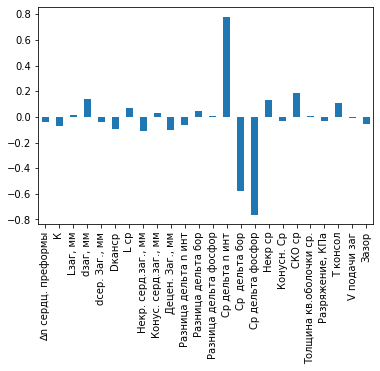

In [343]:
dfcoef.plot(kind = 'bar')

In [344]:
model2 = RandomForestClassifier(n_estimators=50, max_depth=5).fit(df_train[quality_factors], df_train['Выход годного, %'])
model2.predict(df_train[quality_factors])
print('mean_squared_error')
print('Train:', mean_squared_error(df_train['Выход годного, %'], model2.predict(df_train[quality_factors])))
print('Test:', mean_squared_error(df_test['Выход годного, %'], model2.predict(df_test[quality_factors])))
print('r2_score')
print('Train', r2_score(df_train['Выход годного, %'], model2.predict(df_train[quality_factors])))
print('Test', r2_score(df_test['Выход годного, %'], model2.predict(df_test[quality_factors])))
print('roc auc')
print('Train', roc_auc_score(df_train['Выход годного, %'], model2.predict(df_train[quality_factors])))
print('Test', roc_auc_score(df_test['Выход годного, %'], model2.predict(df_test[quality_factors])))

mean_squared_error
Train: 0.0
Test: 0.36666666666666664
r2_score
Train 1.0
Test -0.5277777777777775
roc auc
Train 1.0
Test 0.5416666666666667


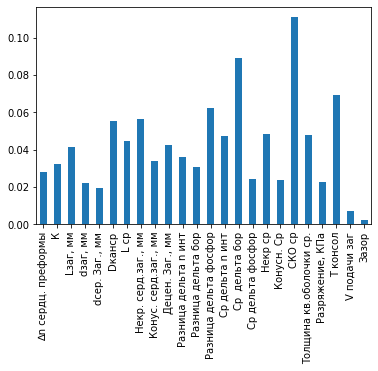

In [345]:
coefs2 = model2.feature_importances_
d2=dict()
for i in range(len(quality_factors)):
    d2.update({quality_factors[i] : coefs2[i]})
dfcoef2 = pd.Series(data=d2)
dfcoef2
dfcoef2.plot(kind = "bar")

In [346]:
model3 = AdaBoostRegressor(n_estimators=100).fit(df_train[quality_factors], df_train['Выход годного, %'])
model3.predict(df_train[quality_factors])
print('mean_squared_error')
print('Train:', mean_squared_error(df_train['Выход годного, %'], model3.predict(df_train[quality_factors])))
print('Test:', mean_squared_error(df_test['Выход годного, %'], model3.predict(df_test[quality_factors])))
print('r2_score')
print('Train', r2_score(df_train['Выход годного, %'], model3.predict(df_train[quality_factors])))
print('Test', r2_score(df_test['Выход годного, %'], model3.predict(df_test[quality_factors])))
print('roc auc')
print('Train', roc_auc_score(df_train['Выход годного, %'], model3.predict(df_train[quality_factors])))
print('Test', roc_auc_score(df_test['Выход годного, %'], model3.predict(df_test[quality_factors])))

mean_squared_error
Train: 0.0013982908270696595
Test: 0.2419430308799879
r2_score
Train 0.9937529499667922
Test -0.00809596199994922
roc auc
Train 1.0
Test 0.7060185185185185


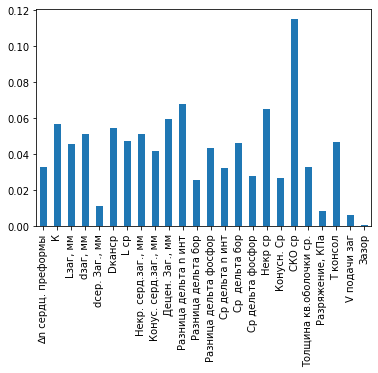

In [347]:
coefs3 = model3.feature_importances_
d3=dict()
for i in range(len(quality_factors)):
    d3.update({quality_factors[i] : coefs3[i]})
dfcoef3 = pd.Series(data=d3)
dfcoef3
dfcoef3.plot(kind = "bar")

In [348]:
model4 = LogisticRegression().fit(df_train[quality_factors], df_train['Выход годного, %'])
model4.predict(df_train[quality_factors])
print('mean_squared_error')
print('Train:', mean_squared_error(df_train['Выход годного, %'], model4.predict(df_train[quality_factors])))
print('Test:', mean_squared_error(df_test['Выход годного, %'], model4.predict(df_test[quality_factors])))
print('r2_score')
print('Train', r2_score(df_train['Выход годного, %'], model4.predict(df_train[quality_factors])))
print('Test', r2_score(df_test['Выход годного, %'], model4.predict(df_test[quality_factors])))
print('roc auc')
print('Train', roc_auc_score(df_train['Выход годного, %'], model4.predict(df_train[quality_factors])))
print('Test', roc_auc_score(df_test['Выход годного, %'], model4.predict(df_test[quality_factors])))

mean_squared_error
Train: 0.08823529411764706
Test: 0.26666666666666666
r2_score
Train 0.6057971014492753
Test -0.11111111111111072
roc auc
Train 0.8695652173913043
Test 0.7083333333333334


C:\Users\21362\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [349]:
coefs4 = model4.coef_
d4=dict()
for i in range(len(quality_factors)):
    d4.update({quality_factors[i] : coefs4[0][i]})
dfcoef4 = pd.Series(data=d4)
dfcoef4

∆n сердц. преформы        -0.121726
К                         -0.207105
Lзаг, мм                  -0.011577
dзаг, мм                   0.297619
dсер. Заг., мм            -0.052077
Dканср                    -0.757455
L ср                       0.651541
Некр. серд.заг., мм       -1.028720
Конус. серд.заг., мм       0.273533
Децен. Заг., мм           -0.749488
Разница дельта n инт      -0.398289
Разница дельта бор         0.142965
Разница дельта фосфор     -0.031582
Ср дельта n инт           -0.218079
Ср  дельта бор            -0.240785
Ср дельта фосфор          -0.153972
Некр ср                    0.751210
Конусн. Ср                -0.046827
СКО ср                     1.541408
Толщина кв.оболочки ср.   -0.123492
Разряжение, КПа           -0.191437
Т консол                   0.952885
V подачи заг              -0.237904
Зазор                     -0.700871
dtype: float64

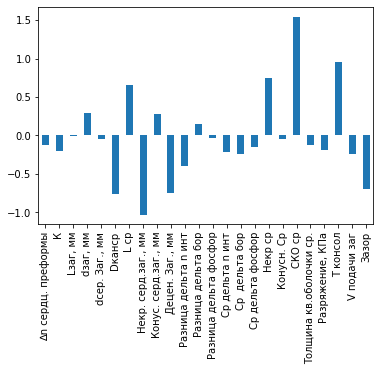

In [350]:
dfcoef4.plot(kind = 'bar')

In [351]:
model5 = KNeighborsRegressor().fit(df_train[quality_factors], df_train['Выход годного, %'])
model5.predict(df_train[quality_factors])
print('mean_squared_error')
print('Train:', mean_squared_error(df_train['Выход годного, %'], model5.predict(df_train[quality_factors])))
print('Test:', mean_squared_error(df_test['Выход годного, %'], model5.predict(df_test[quality_factors])))
print('r2_score')
print('Train', r2_score(df_train['Выход годного, %'], model5.predict(df_train[quality_factors])))
print('Test', r2_score(df_test['Выход годного, %'], model5.predict(df_test[quality_factors])))
print('roc auc')
print('Train', roc_auc_score(df_train['Выход годного, %'], model5.predict(df_train[quality_factors])))
print('Test', roc_auc_score(df_test['Выход годного, %'], model5.predict(df_test[quality_factors])))

mean_squared_error
Train: 0.12411764705882355
Test: 0.288
r2_score
Train 0.445487922705314
Test -0.1999999999999995
roc auc
Train 0.9314009661835748
Test 0.5648148148148148


In [352]:
model6 = KNeighborsClassifier().fit(df_train[quality_factors], df_train['Выход годного, %'])
model6.predict(df_train[quality_factors])
print('mean_squared_error')
print('Train:', mean_squared_error(df_train['Выход годного, %'], model6.predict(df_train[quality_factors])))
print('Test:', mean_squared_error(df_test['Выход годного, %'], model6.predict(df_test[quality_factors])))
print('r2_score')
print('Train', r2_score(df_train['Выход годного, %'], model6.predict(df_train[quality_factors])))
print('Test', r2_score(df_test['Выход годного, %'], model6.predict(df_test[quality_factors])))
print('roc auc')
print('Train', roc_auc_score(df_train['Выход годного, %'], model6.predict(df_train[quality_factors])))
print('Test', roc_auc_score(df_test['Выход годного, %'], model6.predict(df_test[quality_factors])))

mean_squared_error
Train: 0.20588235294117646
Test: 0.43333333333333335
r2_score
Train 0.08019323671497591
Test -0.8055555555555551
roc auc
Train 0.6956521739130435
Test 0.4722222222222222
